In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [66]:
data = pd.read_csv('train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
X = data[data.columns[1:]].to_numpy()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [68]:
X.max()

255

In [69]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [70]:
X.max()

1.0

In [71]:
y = data[data.columns[0]]
# one hot encoding with 0 and 1
y = pd.get_dummies(y)
y = y.apply(lambda x: x.astype(int))
# convert to numpy array
y = y.values
y

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [151]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [154]:
X_train.shape

(33600, 784)

In [174]:
def init_params():
    W1 = np.random.randn(784, 10) * 0.1
    b1 = np.random.randn(1, 10) * 0.01
    W2 = np.random.randn(10, 10) * 0.1
    b2 = np.random.randn(1, 10) * 0.01
    return W1, b1, W2, b2

In [175]:
def softmax(x):
    return(np.exp(x) / np.exp(x).sum() + 1e-6)

In [318]:
def call(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    return A2

In [323]:
def train_step(X, W1, b1, W2, b2, y, alpha):
    #Forward Propagation
    Z1 = np.dot(X, W1) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    #Backward Propagation
    m = y.shape[1]
    dZ2 = A2 - y
    dW2 = (1/m) * np.dot(A1.T, dZ2)
    db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)
    dZ1 = np.dot(dZ2, W2.T) * (1 - np.power(A1, 2) )#+ (2/3) * np.power(A1, 4)) # derivative of tanh
    dW1 = (1/m) * np.dot(X.T, dZ1)
    db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)
    #update weights
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2, A2

In [324]:
def accuracy(predictions, Y):
    labels_predicted = np.argmax(predictions, axis = 1)
    labels_actual = np.argmax(Y,axis=1)
    return np.sum(labels_predicted == labels_actual) / labels_actual.size

In [325]:
def gradient_descent(X, y, alpha, iterations, batch_size):
    W1, b1, W2, b2 = init_params()

    for i in range(iterations):
        errors = []
        accuracies = []

        for batch in range(0, X.shape[0], batch_size):
            X_batch = X[batch:batch+batch_size]
            y_batch = y[batch:batch+batch_size]
            X, W1, b1, W2, b2, y, alpha
            W1, b1, W2, b2, A2 = train_step( X_batch, W1, b1, W2, b2, y_batch, alpha)
            
            errors.append(np.mean( np.power(A2 - y_batch, 2)))
            accuracies.append(accuracy(A2, y_batch))

        print("Epoch {}: MSE {} | Accuracy {}".format(i, np.mean(errors),np.mean(accuracies)))
    return W1, b1, W2, b2

In [326]:
W1, b1, W2, b2 = gradient_descent(X_train, y_train, 0.01, 100, 1)

Epoch 0: MSE 0.04832533004058577 | Accuracy 0.704047619047619
Epoch 1: MSE 0.021309349181084958 | Accuracy 0.8685416666666667
Epoch 2: MSE 0.01696011902262653 | Accuracy 0.8911011904761905
Epoch 3: MSE 0.015036820213086409 | Accuracy 0.9022321428571428
Epoch 4: MSE 0.01389524984412042 | Accuracy 0.9093154761904761
Epoch 5: MSE 0.013111537206995224 | Accuracy 0.9144345238095238
Epoch 6: MSE 0.012526520368718846 | Accuracy 0.9179166666666667
Epoch 7: MSE 0.012060002661013002 | Accuracy 0.9208928571428572
Epoch 8: MSE 0.011670367016178596 | Accuracy 0.9234523809523809
Epoch 9: MSE 0.011335854355125722 | Accuracy 0.9259226190476191
Epoch 10: MSE 0.011043917473986972 | Accuracy 0.9273511904761905
Epoch 11: MSE 0.01078583975588831 | Accuracy 0.9291369047619048
Epoch 12: MSE 0.010554806626851305 | Accuracy 0.9308333333333333
Epoch 13: MSE 0.010345563492087784 | Accuracy 0.9325297619047619
Epoch 14: MSE 0.010154400552786625 | Accuracy 0.9341071428571428
Epoch 15: MSE 0.009978750664166078 | Acc

In [327]:
def predict(X, W1, b1, W2, b2):
    A2 = call(X, W1, b1, W2, b2)
    return A2

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[index].reshape(1,784)
    prediction = predict(current_image, W1, b1, W2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Predicted label: ", np.argmax(prediction))
    print("Label: ", np.argmax(label))
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [[1.01087063e-06 1.13443877e-03 3.01939691e-05 9.93547001e-01
  1.09892875e-06 2.59154644e-04 1.00182855e-06 3.58699068e-06
  4.42108496e-03 6.11428410e-04]]
Predicted label:  3
Label:  3


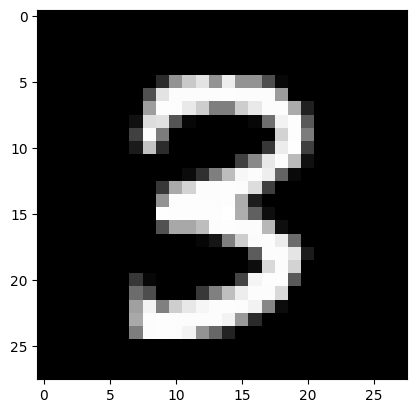

Prediction:  [[1.00211581e-06 8.19361906e-06 1.01093050e-06 9.98170339e-01
  1.01170551e-06 1.82443218e-03 1.00008553e-06 1.00588659e-06
  1.00347442e-06 1.00081981e-06]]
Predicted label:  3
Label:  3


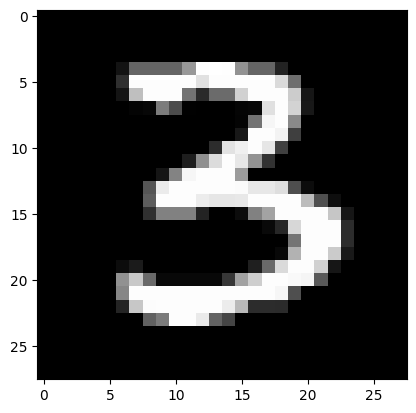

Prediction:  [[5.12365705e-04 3.77141209e-06 1.57107251e-03 3.03097236e-02
  1.00262803e-06 1.60173028e-03 2.31839933e-06 6.40409437e-06
  9.65670766e-01 3.30845602e-04]]
Predicted label:  8
Label:  8


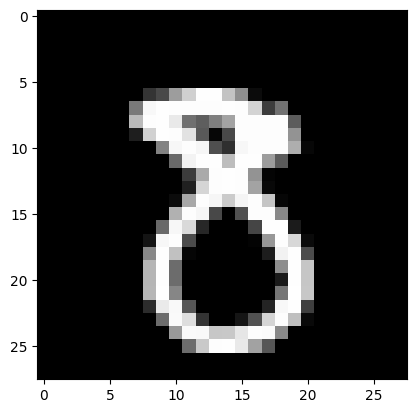

Prediction:  [[3.30511341e-03 1.92545089e-06 1.92867417e-02 1.03705753e-05
  2.93271694e-05 4.58142164e-04 9.76906477e-01 1.04150614e-06
  9.77690145e-06 1.08378854e-06]]
Predicted label:  6
Label:  6


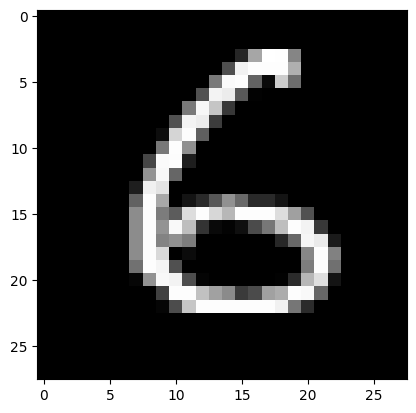

In [328]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [329]:
test_predictions = predict(X_test, W1, b1, W2, b2)
accuracy(test_predictions, y_test)

0.9221428571428572